# РГР 4. Метод Фурье для решения начально-краевой задачи для волнового уравнения

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

__Задание.__ Методом Фурье решить начально-краевую задачу для однородного волнового уравнения
$$
    \begin{cases}
    u_{tt} = 9 u_{xx}, \quad t > 0, \quad 0 < x < 2, \\
    u(x, 0) = \cos 2 \pi x, \quad u_t(x, 0) = 1, \\
    u_x(0, t) = u_x(2, t) = 0.
    \end{cases}
$$
Изобразить полученное решение в трехмерном пространстве, используя доступные программные средства.

_Шаг 1._ Будем искать решение в виде $u(x, t) = X(x) T(t)$. Подставим его в исходное уравнение:
$$ X(x) T''(t) = 9 X''(x) T(t). $$
Разделим обе части уравнения на $9 X(x) T(t) \neq 0$. Деление на 9 выполняется для дальнейшего удобства. Получим
$$ \dfrac{T''(t)}{9 T(t)} = \dfrac{X''(x)}{X(x)} = -\lambda. $$
Обе части уравнения, зависящие от независимых переменных $x$, $t$ могут быть равны друг другу для любых $x$ и $t$ тогда, и только тогда, когда они равны константе. За эту константу возьмем $-\lambda$ (минус для удобства). На данный момент нас интересует правая часть уравнения, которую мы перепишем в виде:
$$ X''(x) + \lambda X(x) = 0. $$

Подставим искомое решение в краевые условия:
$$ X'(0)T(t) = X'(2)T(t) = 0 \quad | :T(t) \neq 0. $$
$$ X'(0) = X'(2) = 0. $$

Получили краевую задачу Штурма-Лиувилля для нахождения собственных функций и собственных значений:
$$
    \begin{cases}
    X''(x) + \lambda X(x) = 0, \\
    X'(0) = X'(2) = 0.
    \end{cases}
$$

_Шаг 2._ Решим задачу Штурма-Лиувилля:
$$ X''(x) + \lambda X(x) = 0, $$
$$ k^2 + \lambda = 0. $$
Возможны три случая:
1. $\lambda < 0$: $k^2 = -\lambda$, $k_{1, 2} = \pm\sqrt{\lambda},$
$$ X(x) = A e^{\sqrt{\lambda} x} + B e^{-\sqrt{\lambda} x}, $$
$$ X'(x) = \sqrt{\lambda} A e^{\sqrt{\lambda} x} - \sqrt{\lambda} B e^{-\sqrt{\lambda} x}. $$
Подставим краевые условия:
$$
    \begin{cases}
    X'(0) = \sqrt{\lambda} A - \sqrt{\lambda} B = \sqrt{\lambda} (A - B) = 0, \\
    X'(2) = \sqrt{\lambda} A e^{2 \sqrt{\lambda}} - \sqrt{\lambda} B e^{\sqrt{\lambda}} = 0
    \end{cases}
$$
Первое уравнение: По рассматриваемому условию $\lambda \neq 0$, следовательно, $A = B$.
Тогда второе уравнение: $\sqrt{\lambda} B \left( e^{2 \sqrt{\lambda}} - e^{-2 \sqrt{\lambda}} \right) = 0$.
Опять же, $\lambda \neq 0$, по той же причине $e^{2 \sqrt{\lambda}} \neq e^{-2 \sqrt{\lambda}}$. Остается единственный вариант, $B = 0$, тогда $A = 0$, и $X(x) = 0$, что нам не подходит.

2. $\lambda = 0$: $k^2 = 0$, $k_{1, 2} = 0$,
$$ X(x) = A + B x, $$
$$ X'(x) = B. $$
Краевые условия:
$$
    \begin{cases}
    X'(0) = B = 0, \\
    X'(2) = B = 0
    \end{cases}
$$
Следовательно, $\lambda = 0$ — собственное значение, $X(x) = A$ — собственная функция.

3.  $\lambda > 0$: $k^2 = -\lambda$, $k_{1, 2} = \pm i \sqrt{\lambda}$,
$$ X(x) = A \cos(\sqrt{\lambda} x) + B \sin(\sqrt{\lambda} x), $$
$$ X'(x) = -\sqrt{\lambda} A \sin(\sqrt{\lambda} x) + \sqrt{\lambda} B \cos(\sqrt{\lambda}), $$
$$
    \begin{cases}
    X'(0) = \sqrt{\lambda} B = 0, \\
    X'(2) = -\sqrt{\lambda} A \sin(\sqrt{\lambda} 2) + \sqrt{\lambda} B \cos(\sqrt{\lambda} 2) = 0.
    \end{cases}
$$
Первое уравнение: $\lambda \neq 0$ $\Rightarrow$ $B = 0$.
Второе уравнение: $-\sqrt{\lambda} A \sin(\sqrt{\lambda} 2) = 0$. 
Опять же, $\lambda \neq 0$. Также, если $A = 0$, то $X(x) = 0$, что нам не подходит. Поэтому, считаем, что $A \neq 0$. Тогда остается $\sin(\sqrt{\lambda} 2) = 0$. Это выполняется тогда, и только тогда, когда $\sqrt{\lambda} 2 = \pi n$, $n = 1, 2, \dots$
Получаем собственные значения $\lambda_n = \left( \dfrac{\pi n}{2} \right)^2$, $n = 1, 2, \dots$ и соответствующие им собственные функции $X_n(x) = A_n \cos\left( \dfrac{\pi n x}{2} \right)$, $n = 1, 2, \dots$

_Итого:_
__Собственные значения__: $\lambda_n = \left( \dfrac{\pi n}{2} \right)^2$, $n = 0, 1, 2, \dots$ (включает $\lambda_0 = 0$ из второго случая).
__Собственные функции__: $X_n(x) = A_n \cos\left( \dfrac{\pi n x}{2} \right)$, $n = 0, 1, 2, \dots$ (включает $X_0(x) = A_0$ из второго случая).

_Шаг 3._ Получили бесконечное число решений $u_n = T_n A_n \cos\left(\dfrac{\pi n x}{2}\right)$. По принципу суперпозиции окончательное решение ищем в виде
$$ u(x, t) = \sum\limits_{n = 0}^\infty T_n(t) A_n \cos\left(\dfrac{\pi n x}{2}\right). $$

_Шаг 4._ Рассмотрим начальные функции $\phi(x) = \cos(2\pi x)$, $\psi(x) = 1$. Необходимо разложить их в ряд по собственным функциям $X_n(x) = \cos\left(\dfrac{\pi n x}{2}\right)$:
$$ \phi(x) = \sum\limits_{n = 0}^\infty \phi_n \cos\left(\dfrac{\pi n x}{2}\right), $$
$$ \phi_n =
    \begin{cases}
    \dfrac{1}{L} \int\limits_0^L \phi(x) dx, \quad n = 0, \\
    \dfrac{2}{L} \int\limits_0^L \phi(x) \cos\left(\dfrac{\pi n x}{2}\right) dx, \quad n > 0.
    \end{cases}
$$
$$ \psi(x) = \sum\limits_{n = 0}^\infty \psi_n \cos\left(\dfrac{\pi n x}{2}\right), $$
$$ \psi_n =
    \begin{cases}
    \dfrac{1}{L} \int\limits_0^L \psi(x) dx, \quad n = 0, \\
    \dfrac{2}{L} \int\limits_0^L \psi(x) \cos\left(\dfrac{\pi n x}{2}\right) dx, \quad n > 0.
    \end{cases}
$$

Подсчитаем значения $\phi_n$.
$$ \phi_0 = \dfrac{1}{2} \int\limits_0^2 \cos(2 \pi x) dx = \left.\dfrac{1}{2} \dfrac{1}{2\pi} \sin(2\pi x)\right|_0^2 = 0. $$
$$ \phi_n = \dfrac{2}{2} \int\limits_0^2 \cos(2 \pi x) \cos\left(\dfrac{\pi n x}{2}\right) dx =
    \begin{cases}
    1, \quad n = 4, \\
    0, \quad n \neq 4, n > 0.
    \end{cases}
$$
Таким образом,
$$ \phi_n = 
    \begin{cases}
    1, \quad n = 4, \\
    0, \quad n \neq 4.
    \end{cases}
$$

Подсчитаем значения $\psi_n$.
$$ \psi_0 = \dfrac{1}{2} \int\limits_0^2 dx = \left.\dfrac{1}{2} x \right|_0^2 = 1. $$
$$ \psi_n = \int\limits_0^2 \cos\left(\dfrac{\pi n x}{2}\right) dx = \left.\dfrac{2}{\pi n} \sin\left(\dfrac{\pi n x}{2}\right)\right|_0^2 = 0, \quad n > 0. $$
Таким образом,
$$ \psi_n = 
    \begin{cases}
    1, \quad n = 0, \\
    0, \quad n > 0.
    \end{cases}
$$

_Шаг 5._ Подставим $u(x, t)$ из шага 3 в исходное уравнение, перенеся всё в левую сторону $u_{tt} - 9 u_{xx} = 0$:
$$ \sum\limits_{n = 0}^\infty T_n''(t) A_n \cos\left(\dfrac{\pi n x}{2}\right) - 9 \sum\limits_{n = 0}^\infty T_n(t) A_n \left( -\dfrac{\pi^2 n^2}{4} \right) \cos\left(\dfrac{\pi n x}{2}\right) = 0. $$
Сгруппируем по косинусу:
$$ \sum\limits_{n = 0}^\infty \left[ T_n''(t) + \dfrac{9}{4} \pi^2 n^2 T_n(t) \right] A_n \cos\left(\dfrac{\pi n x}{2}\right) = 0. $$

Таким образом, для любого $x$:
$$ T_n''(t) + \dfrac{9}{4} \pi^2 n^2 T_n(t) = 0. $$

Подставим $u(x, t)$ из шага 3 и разложения в ряд по собственным функциям начальных функций $\phi(x)$ и $\psi(x)$:
$$ \sum\limits_{n = 0}^\infty T_n(0) A_n \cos\left(\dfrac{\pi n x}{2}\right) = \sum\limits_{n = 0}^\infty \phi_n \cos\left(\dfrac{\pi n x}{2}\right), $$
$$ \sum\limits_{n = 0}^\infty T'_n(0) A_n \cos\left(\dfrac{\pi n x}{2}\right) = \sum\limits_{n = 0}^\infty \psi_n \cos\left(\dfrac{\pi n x}{2}\right), $$

Группируя по косинусу, получим для любого $x$
$$ T_n(0) = \dfrac{\phi_n}{A_n}, \quad T'_n(0) = \dfrac{\psi_n}{A_n}. $$

_Шаг 6._ Получили бесконечное множество задач Коши для обыкновенного дифференциального уравнения второго порядка вида
$$
    \begin{cases}
    T_n''(t) + \dfrac{9}{4} \pi^2 n^2 T_n(t) = 0, \\
    T_n(0) = \dfrac{\phi_n}{A_n}, \quad T'_n(0) = \dfrac{\psi_n}{A_n},
    \end{cases}
$$
где точные значения начальных значений варьируется в зависимости от $n$ согласно результатам, полученным в шаге 4. А именно, нам нужно рассмотреть три случая: $n = 0$, $n = 4$ и все остальные $n$.

1. $n = 0$:
$$
    \begin{cases}
    T_0''(t) = 0, \\
    T_0(0) = 0, \quad T'_0(0) = \dfrac{1}{A_n}.
    \end{cases}
$$
Интегрируем уравнение:
$$ T'_n(t) = C_1, \quad T_n(t) = C_1 t + C_2. $$
Подставляем начальные условия:
$$
    \begin{cases}
    T_0(0) = C_2 = 0, \\
    T'_0(0) = C_1 = \dfrac{1}{A_0}.
    \end{cases}
$$
Итого: $ T_0(t) = \dfrac{1}{A_0} t $.

2. $n = 4$:
$$
    \begin{cases}
    T_4''(t) + 36 \pi^2 T_4(t) = 0, \\
    T_4(0) = \dfrac{1}{A_4}, \quad T'_4(0) = 0.
    \end{cases}
$$
Решение уравнения:
$$ k^2 + 36 \pi^2  = 0, \ \Rightarrow \ k^2 = -36 \pi^2, \ \Rightarrow \ k_{1, 2} = \pm 6 \pi i, $$
$$ T_4(t) = C_1 \cos(6 \pi t) + C_2 \sin(6 \pi t). $$
$$ T'_4(t) = -6 \pi C_1 \sin(6 \pi t) + 6 \pi C_2 \cos(6 \pi t). $$
Подставляем начальные условия:
$$
    \begin{cases}
    T_4(0) = C_1 = \dfrac{1}{A_4}, \\
    T'_4(0) = 6 \pi C_2 = 0, \ \Rightarrow C_2 = 0.
    \end{cases}
$$
Итого: $T_4(t) = \dfrac{1}{A_4} \cos(6 \pi t)$.

3. $n > 0, \ n \neq 4$:
$$
    \begin{cases}
    T_n''(t) + \dfrac{9}{4} \pi^2 n^2 T_n(t) = 0, \\
    T_n(0) = 0, \quad T'_n(0) = 0,
    \end{cases}
$$
Можно сразу сказать, что решение этой задачи — $T_n(t) = 0$, так как оба уравнение и начальные условия — однородные. Но давайте покажем это.
Решение уравнения:
$$ k^2 + \dfrac{9}{4} \pi^2 n^2 = 0, \ \Rightarrow \ k^2 = -\dfrac{9}{4} \pi^2 n^2 \ \Rightarrow \ k_{1, 2} = \pm\dfrac{3}{2}\pi n i, $$
$$ T_n(t) = C_1 \cos\left(\dfrac{3}{2}\pi n t\right) + C_2 \sin\left( \dfrac{3}{2}\pi n t \right). $$
$$ T'_n(t) = -\dfrac{3}{2}\pi n C_1 \sin\left( \dfrac{3}{2}\pi n t \right) + \dfrac{3}{2}\pi n C_2 \cos\left( \dfrac{3}{2}\pi n t \right). $$
Подставляем в начальные условия:
$$
    \begin{cases}
    T_n(0) = C_1 = 0, \\
    T'_n(0) = \dfrac{3}{2}\pi n C_2 = 0
    \end{cases}
$$
Итого: $T_n(t) = 0$, $n > 0$, $n \neq 4$.

_Шаг 7._ Запишем финальное решение:
$$ u(x, t) = \sum\limits_{n = 0}^\infty T_n(t) A_n \cos\left(\dfrac{\pi n x}{2}\right), $$
$$ u(x, t) = t + \cos(6 \pi t) \cos(2 \pi x). $$

In [19]:
def u_fun(x, t):
    return t + np.cos(6 * np.pi * t) * np.cos(2 * np.pi * x)

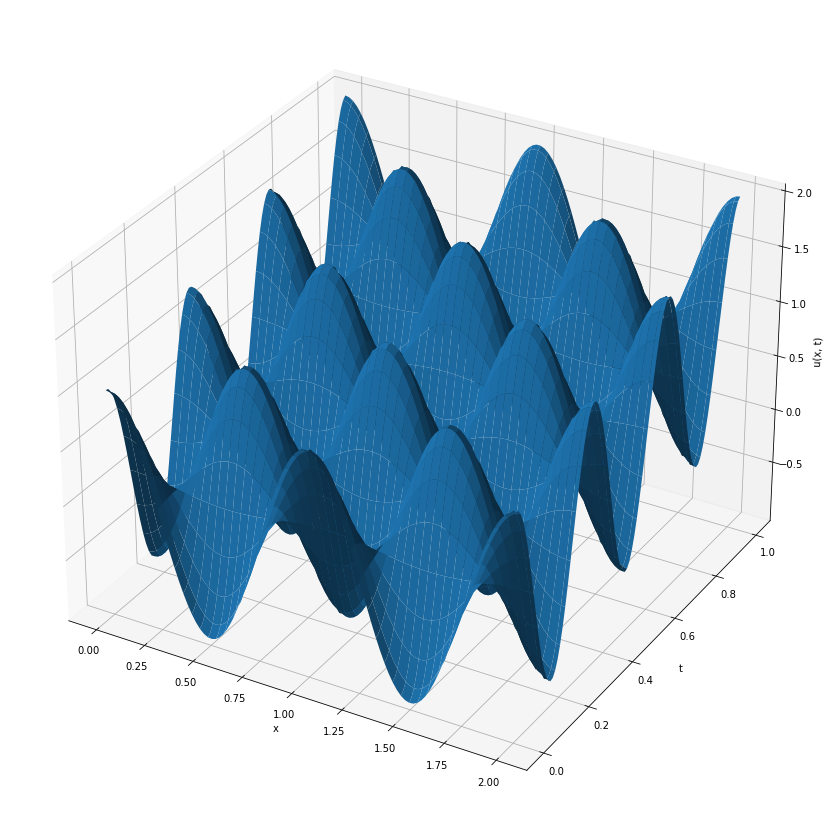

In [28]:
x = np.linspace(0, 2, 100)
t = np.linspace(0, 1, 100)
xr, tr = np.meshgrid(x, t)
u = np.array(u_fun(np.ravel(xr), np.ravel(tr)))
ur = u.reshape(xr.shape)

fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xr, tr, ur)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
plt.show()